In [64]:
# import numpy as np
# import pandas as pd
# df = pd.read_csv('cmake-build-debug/outputCSV.csv', header=[0,1])
# plt.plot(0, 0, marker = 'o', markersize=20, color="black")
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

In [65]:
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


df = pd.read_csv('cmake-build-debug/outputCSV.csv', header=[0,1])

def doPlot2D(x, y, width, height, colour, replot: bool):

    
    # plt.style.use('seaborn-v0_8-deep')

    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)

    plt.plot(x, y, alpha=0.7, color=colour)

    # ax.set_xlim(xlim[0], xlim[1])
    # ax.set_ylim(ylim[0], ylim[1])

    # plt.title(f"T = {df.Iteration.iat[-1]}")
    plt.grid(alpha=0.3)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
def doPlot3D(x, y, z):
 
    # plt.style.use('seaborn-v0_8-deep')

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(0, 0, 0, s=50, c="black")
    ax.plot3D(x, y, z, c="green")

#### Simple 2D x,y position

(10001, 30)


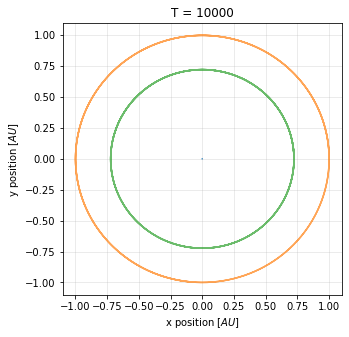

In [66]:
fig, ax = plt.subplots()
# fig.set_size_inches(10, 10)
fig.set_size_inches(5,5)
# plt.plot(0, 0, marker = 'o', markersize=5, color="black") # sun plot
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)

for i in range(0, int(df.shape[1]/9)):
    x = df[f'{i}']['x']
    y = df[f'{i}']['y']

    plt.plot(x, y, alpha=0.7)

plt.grid(alpha=0.3)
plt.xlabel("x position $[AU]$")
plt.ylabel("y position $[AU]$")
plt.title(f"T = {df.shape[0]-1}")

print(df.shape)

## **Energy of System**

**Gravitational Potential Energy**

because of the way the forces are calculated, each pair-wise force appears twice.
to account for this, forces must be halved =>

**GPE** -> force * 0.5

**Kinetic Energy**

**KE** = 1/2 * mass * velocity^2

In [95]:
i = 1
mass = df[f'{i}']['M']
x = df[f'{i}']['x']
y = df[f'{i}']['y']
z = df[f'{i}']['z']
vx = df[f'{i}']['vx']
vy = df[f'{i}']['vy']
vz = df[f'{i}']['vz']
fx = df[f'{i}']['fx']
fy = df[f'{i}']['fy']
fz = df[f'{i}']['fz']

0.999997


##### Calculating $E_{p, 0}$         [*initial total gravitational potential energy*]

In [99]:
# GPE => F_total * 0.5
# this loops through all bodies to calculate GPE_0 for system
gravPotEnergy0 = 0.0;
for i in range(0, int(df.shape[1]/9)):
    fx = df[f'{i}']['fx'][0]
    fy = df[f'{i}']['fy'][0]
    fz = df[f'{i}']['fz'][0]

    gravPotEnergy0 += 0.5 * (fx + fy + fz)
# print(gravPotEnergy)

##### Calculating $E_{k, 0}$         [*initial total kinetic energy*]

In [106]:
# KE => 0.5 * mass * velocity^2
# this loops through all bodies to calculate KE_0 for system
kineticEnergy0 = 0.0;
for i in range(0, int(df.shape[1]/9)):
    vx   = df[f'{i}']['vx'][0]
    vy   = df[f'{i}']['vy'][0]
    vz   = df[f'{i}']['vz'][0]
    mass = df[f'{i}']['M' ][0]

    velocity = np.sqrt(vx**2 + vy**2 + vz**2)

    kineticEnergy0 += 0.5 * mass * velocity**2
# print(kineticEnergy)

##### Calculating $E_{total, 0}$         [*initial total energy*]

In [101]:
# Units are as follows:
# GPE ->> AU/days^2
# KE  ->> ( Solar Masses * AU^2 ) / days^2
totalE0 = gravPotEnergy0 + kineticEnergy0
print(totalE0)

0.0032630964002810002


##### Calculating $E_{k, 0}$         [*initial total kinetic energy*]


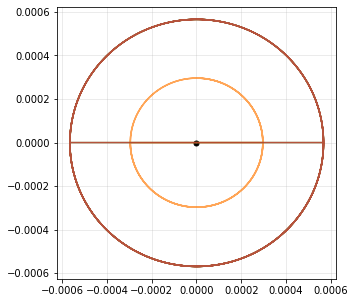

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
plt.plot(0, 0, marker = 'o', markersize=5, color="black")
for i in range(0, int(df.shape[1]/9)):
    x = df[f'{i}']['fx']
    y = df[f'{i}']['fy']

    plt.plot(x, y, alpha=0.7)
    plt.grid(alpha=0.3)
# x = df[f'{1}']['fx']
# y = df[f'{1}']['fy']
plt.plot(x, y, alpha=0.7)
plt.grid(alpha=0.3)

In [69]:
print(len(df.columns[0]))
print(len(df.columns[3]) + 1)
print(df.shape[1]/6)

2
3
5.0


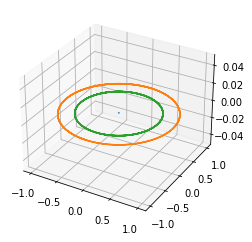

In [70]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plt.xlim(-100, 100)
# plt.ylim(-100, 100)
# plt.zlim(-100, 100)
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# ax.set_zlim(-10, 10)

for i in range(0, int(df.shape[1]/9)):
    x = df[f'{i}']['x']
    y = df[f'{i}']['y']
    z = df[f'{i}']['z']


    # ax.scatter3D(0, 0, 0, s=50, c="black")
    ax.plot3D(x, y, z)

In [71]:
doPlot3D(df.xVel, df.yVel, df.Iteration)

AttributeError: 'DataFrame' object has no attribute 'xVel'

#### **X position vs Y position**
*for all timesteps*

In [ ]:
doPlot2D(df.xPos, df.yPos, 10, 10, colour='black', replot=False)
plt.plot(0, 0, marker = 'o', markersize=20, color="black")
plt.xlabel("$x$ Position [$AU$]")
plt.ylabel("$y$ Position [$AU$]")
# plt.savefig('graphs/x-vs-y_pos_ts_1_1M-steps-wvenus.png', dpi='figure')

#### **Velocity vs Time Step**

In [ ]:
doPlot2D(df.T_S, df.xVel, 20, 10, True)